<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Elizabeth Ramírez Z.
- Nombre de alumno 2: Lucas Orellana J.

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ElLuquitas/MDS7202-labs)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
df_homero = pd.read_csv('energia_homero.csv')
display(df_homero.head())
print(f'Cantidad de observaciones:{df_homero.shape[0]}')

df_homero['date'] = pd.to_datetime(df_homero['date'])

print(f'\nFecha mínima: {df_homero["date"].min()}')
print(f'Fecha máxima: {df_homero["date"].max()}')

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


Cantidad de observaciones:1498

Fecha mínima: 2016-06-01 00:00:00
Fecha máxima: 2020-07-07 00:00:00


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

**0. Creación de conjuntos de entrenamiento y prueba**

In [4]:
# Taggeo de observaciones para entrenamiento y testeo
df_homero['set'] = np.where(df_homero.date >= pd.Timestamp('2020-03-01'), 'Test', 'Train')

# Separación en dos datasets según train o test
train = df_homero[df_homero['set'] == 'Train'].copy()
test = df_homero[df_homero['set'] == 'Test'].copy()

# Datos de entrenamiento
X_train = train.drop(columns = ['set'])
y_train = train['Energy_kWh'].copy()

# Datos de testeo
X_test = test.drop(columns = ['set'])
y_test = test['Energy_kWh'].copy()

In [5]:
# Gráfico de la serie de tiempo
fig = px.scatter(df_homero, x = df_homero.date, y='Energy_kWh', title='Energía consumida diariamente', color = 'set')
fig.update_traces(marker=dict(size=3.5))
fig.show()

**1. Pipeline de Tendencia**

In [6]:
# Usaremos la clase TimeTransformer() vista en clases
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformerT(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

transformer = TimeTransformerT()
transformer.fit_transform(X_train)

Pipeline_trend = Pipeline([
    ('time_features', TimeTransformerT()),
    ('ols', LinearRegression())
])

**2. Entrenamiento Modelo Lineal**

In [8]:
Pipeline_trend.fit(X_train, y_train)
train_pred = Pipeline_trend.predict(X_train)
test_pred = Pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [9]:
# plot
fig = px.scatter(df_homero, x = df_homero.date, y='Energy_kWh', title='Forecast de energía consumida diariamente', color = 'set')
fig.add_scatter(x=df_homero.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

Podemos ver que existe una tendencia a la baja en el consumo eléctrico, pero el modelo no llega a predecir correctamente los valores ni en el conjunto de entrenamiento ni en el conjunto de test.

In [10]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.66


Lo anterior se ve reflejado por los resultados de los errores absolutos, teniendo en ambas etapas valores muy altos.

**3. Gráfico del error**

In [11]:
# Cálculo de errores en las etapas de entrenamiento y testeo
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# Gráfica con los errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()

Del gráfico anterior podemos observar que sí hay un comportamiento estacional en esta serie, alcanzando máximos de consumo entre los meses de junio a septiembre (aprox.) y consumos mínimos entre los meses de noviembre a abril (aprox.). Probablemente estos consumos tengan que ver con las temporadas de verano y de invierno.

**4. Pipeline de Estacionalidad**

In [12]:
# Se usará nuevamente la clase TimeTransformer() vista en clases, pero para estacionalidad
class TimeTransformerE(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

In [13]:
transformer = TimeTransformerE(n = 4, p = 365)
transformer.fit_transform(X_train)

Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformerE(n = 4, p = 365)),
    ('ols', LinearRegression())
])

**5. Entrenamiento Modelo Estacionalidad**

In [14]:
# entrenar y predecir
Pipeline_seasonal.fit(X_train, y_train)
train_pred = Pipeline_seasonal.predict(X_train)
test_pred = Pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [15]:
# plot
fig = px.scatter(df_homero, x=df_homero.date, y='Energy_kWh', title='Forecast de energía consumida diariamente', color='set')
fig.add_scatter(x=df_homero.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

Si ahora consideramos la estacionalidad, vemos que el modelo entrenado puede captar las alzas y bajas en los consumos durante los años, pero éste no llega a ser perfecto.

In [16]:
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 5.35
MAE Test: 4.46


Pero, si comparamos los errores absolutos de las predicciones, son bastante más pequeños que los obtenidos con el modelo lineal. Esto se condice con las estacionalidades captadas.

**6. Gráfico del error**

In [17]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()

Ahora, si vemos el comportamiento de este error en un gráfico, vemos que es algo mucho más parecido a una serie estacionaria, tendiendo a parecerse al esperado ruido blanco en este tipo de comportamientos estacionarios.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [18]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/home/lucas/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



**Respuesta:**

**1. Renombramiento de variables**

In [19]:
# Datos de entrenamiento
X_train_prophet = train.drop(columns = ['set'])
X_train_prophet.columns = ['ds', 'y']
y_train_prophet = train['Energy_kWh'].copy()

# Datos de testeo
X_test_prophet = test.drop(columns = ['set'])
X_test_prophet.columns = ['ds', 'y']
X_test_prophet.reset_index(drop=True, inplace=True)
y_test_prophet = test['Energy_kWh'].copy()
y_test_prophet.reset_index(drop=True, inplace=True)

**2. Preparación dataset y predicciones**

In [20]:
model = Prophet()
model.fit(X_train_prophet)

train_pred = model.predict(X_train_prophet)
y_train_pred = train_pred['yhat']
test_pred = model.predict(X_test_prophet)
y_test_pred = test_pred['yhat']

total_pred = pd.concat([train_pred, test_pred])
y_pred = pd.concat([y_train_pred, y_test_pred])

# reset index
total_pred.reset_index(drop = True, inplace = True)
y_pred.reset_index(drop = True, inplace = True)

22:32:50 - cmdstanpy - INFO - Chain [1] start processing
22:32:50 - cmdstanpy - INFO - Chain [1] done processing


**3. Gráfico de componentes y predicciones**

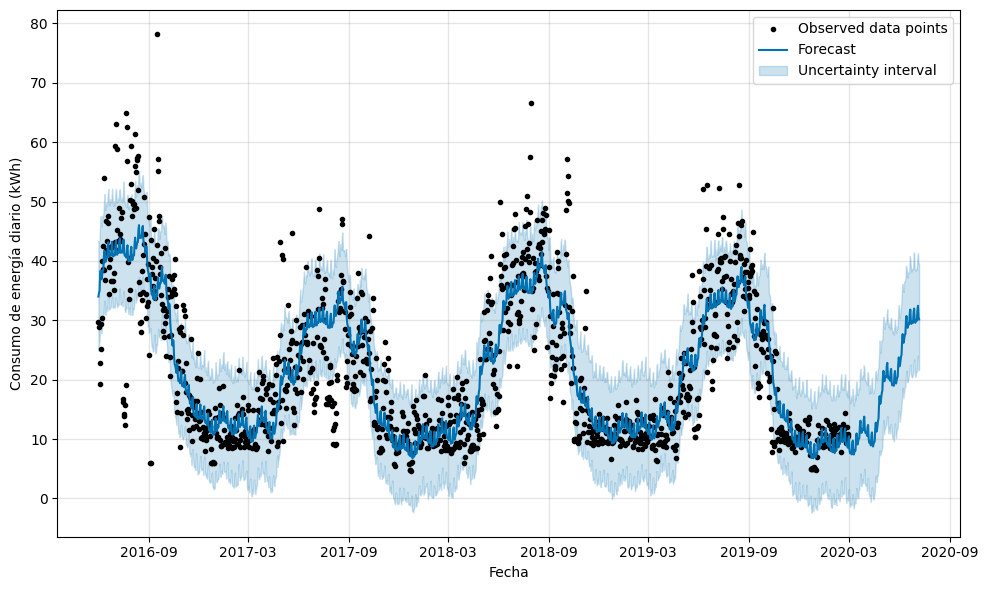

In [21]:
# Predicciones hechas por el modelo
fig1 = model.plot(total_pred,
                  xlabel='Fecha',
                  ylabel='Consumo de energía diario (kWh)',
                  include_legend=True)

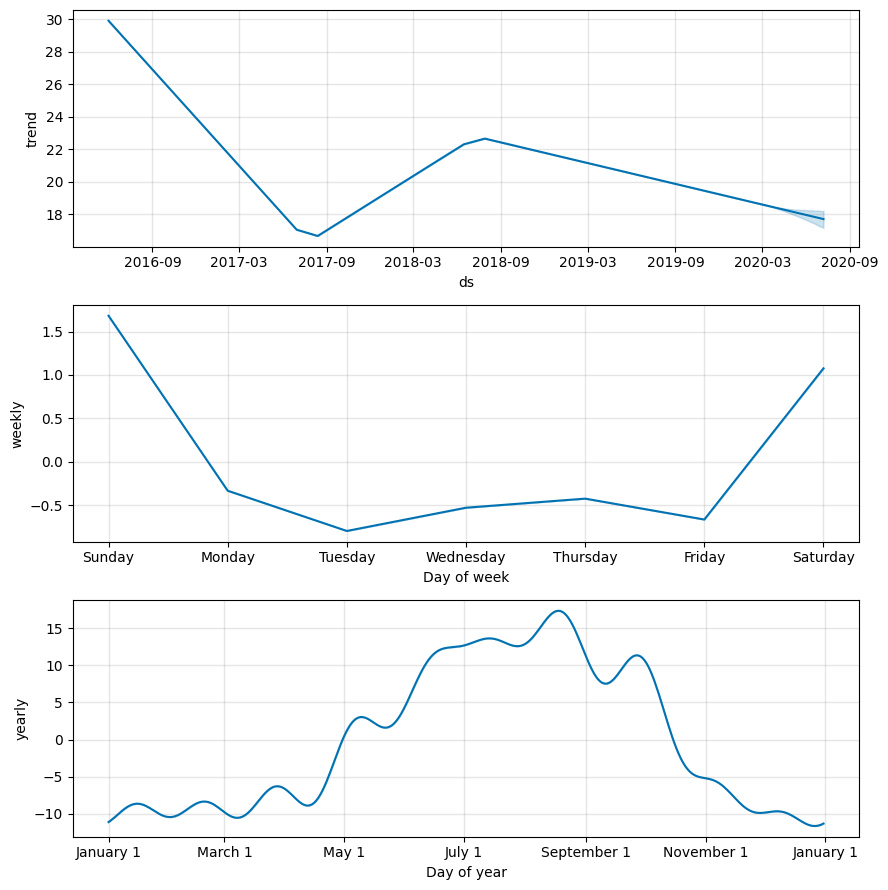

In [22]:
# Componentes del modelo predichas
fig2 = model.plot_components(total_pred)

**4. Cálculo de `MAE`**

In [23]:
mae_train = mean_absolute_error(y_train_prophet, y_train_pred)
mae_test = mean_absolute_error(y_test_prophet, y_test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.82
MAE Test: 4.92


**5. Gráfico del error**

In [24]:
# calculamos errores de train y test
error_train = y_train_prophet - y_train_pred

error_test = y_test_prophet - y_test_pred
error = pd.concat([error_train, error_test]).reset_index(drop = True)

# graficamos errores
fig = px.line(x = df_homero.date, y=error, title='Error en la predicción', color = df_homero.set)
fig.show()

En este gráfico, podemos ver que el comportamiento del error, de igual forma que en el caso anterior, pierde más su comportamiento estacional, asemejándose más al ruido blanco. Aún así se puede ver un leve patrón entre los meses de noviembre y marzo entre cada año. Esto nos da a pensar en primera instancia que aún existen componentes estacionales dentro del modelo y que se pueden llegar a mejorar.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

**0. Selección de variables exógenas**

In [25]:
# Cargamos en el dataset original las nuevas variables
df_homero = pd.read_csv('energia_homero.csv')
df_homero['date'] = pd.to_datetime(df_homero['date'])

df_frink = pd.read_csv('datos_frink.csv')
df_frink['date'] = pd.to_datetime(df_frink['date'])

# Se hace un merge para unir todos los datos según la fecha
df = pd.merge(df_homero, df_frink, on = 'date', how = 'inner')

# Tag de observaciones para entrenamiento y testeo
df['set'] = np.where(df.date >= pd.Timestamp('2020-03-01'), 'Test', 'Train')

In [26]:
# Separación en dos datasets según train o test
train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()

# Datos de entrenamiento
X_train_prophet = train.drop(columns = ['set'])
X_train_prophet.rename(columns = {'date': 'ds', 'Energy_kWh': 'y'}, inplace = True)
y_train_prophet = train['Energy_kWh'].copy()

# Datos de testeo
X_test_prophet = test.drop(columns = ['set'])
X_test_prophet.rename(columns = {'date': 'ds', 'Energy_kWh': 'y'}, inplace = True)
X_test_prophet.reset_index(drop=True, inplace=True)
y_test_prophet = test['Energy_kWh'].copy()
y_test_prophet.reset_index(drop=True, inplace=True)

**1. Modelo con regresores**

In [27]:
model = Prophet()

# Agregar todos los regresores nuevos
regressors = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min']
for regressor in regressors:
    model.add_regressor(regressor)

model.fit(X_train_prophet)

train_pred = model.predict(X_train_prophet)
y_train_pred = train_pred['yhat']
test_pred = model.predict(X_test_prophet)
y_test_pred = test_pred['yhat']

total_pred = pd.concat([train_pred, test_pred])
y_pred = pd.concat([y_train_pred, y_test_pred])

# reset index
total_pred.reset_index(drop = True, inplace = True)
y_pred.reset_index(drop = True, inplace = True)

22:32:52 - cmdstanpy - INFO - Chain [1] start processing
22:32:52 - cmdstanpy - INFO - Chain [1] done processing


**2. Gráfica de predicciones**

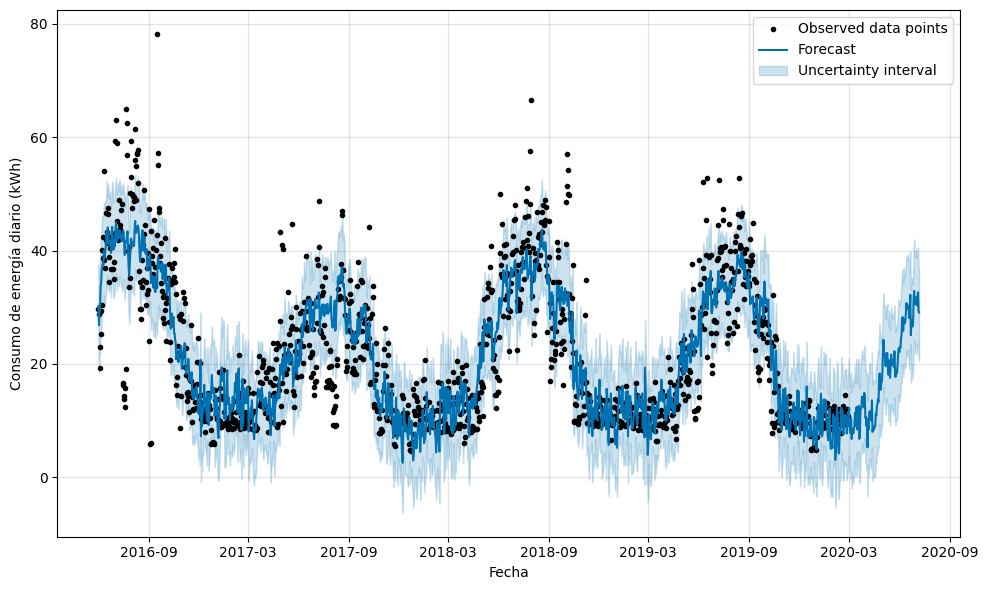

In [28]:
# Predicciones hechas por el modelo
fig1 = model.plot(total_pred,
                  xlabel='Fecha',
                  ylabel='Consumo de energía diario (kWh)',
                  include_legend=True)

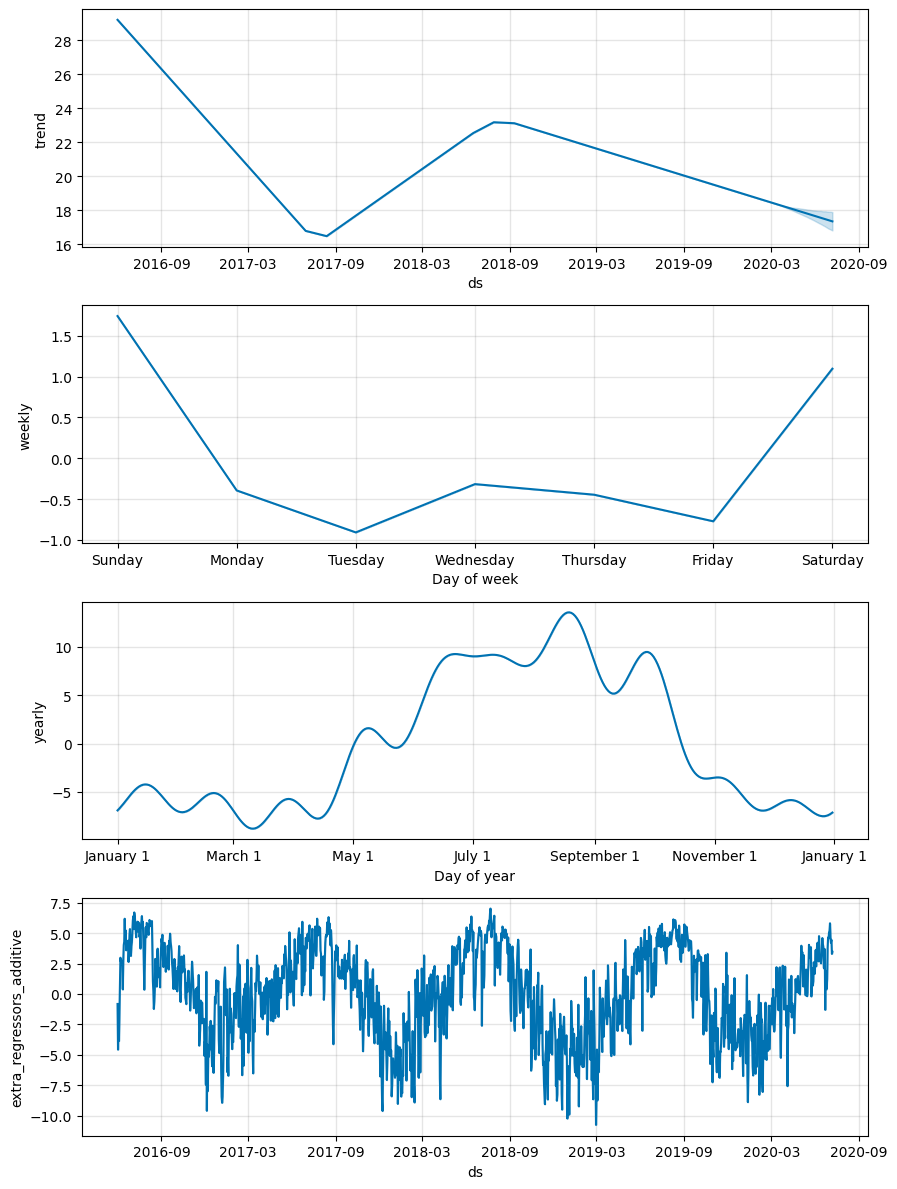

In [29]:
# Componentes del modelo predichas
fig2 = model.plot_components(total_pred)

**3. Cálculo de `MAE`**

In [30]:
mae_train = mean_absolute_error(y_train_prophet, y_train_pred)
mae_test = mean_absolute_error(y_test_prophet, y_test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 4.67
MAE Test: 4.50


**4. Gráfica del error**

In [31]:
# calculamos errores de train y test
error_train = y_train_prophet - y_train_pred

error_test = y_test_prophet - y_test_pred
error = pd.concat([error_train, error_test]).reset_index(drop = True)

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

**1. Autocorrelación parcial**

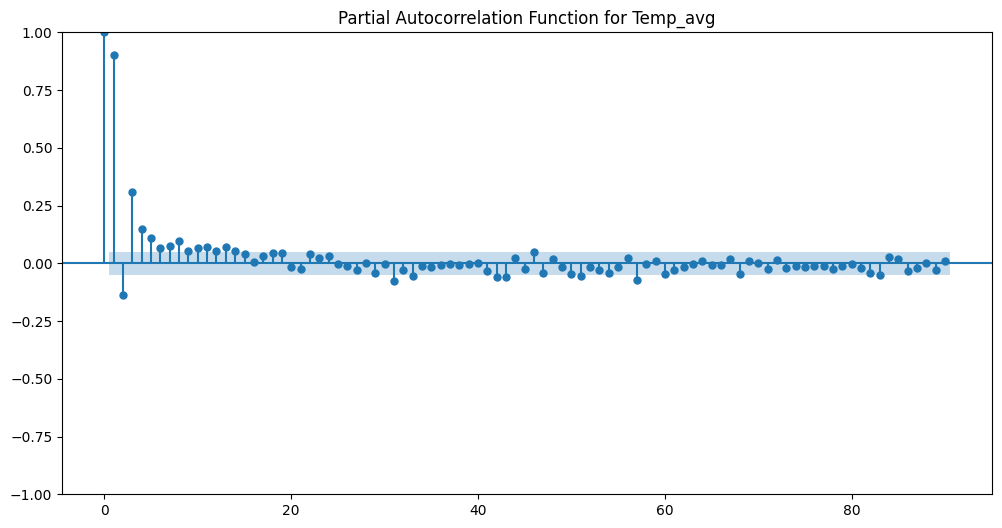

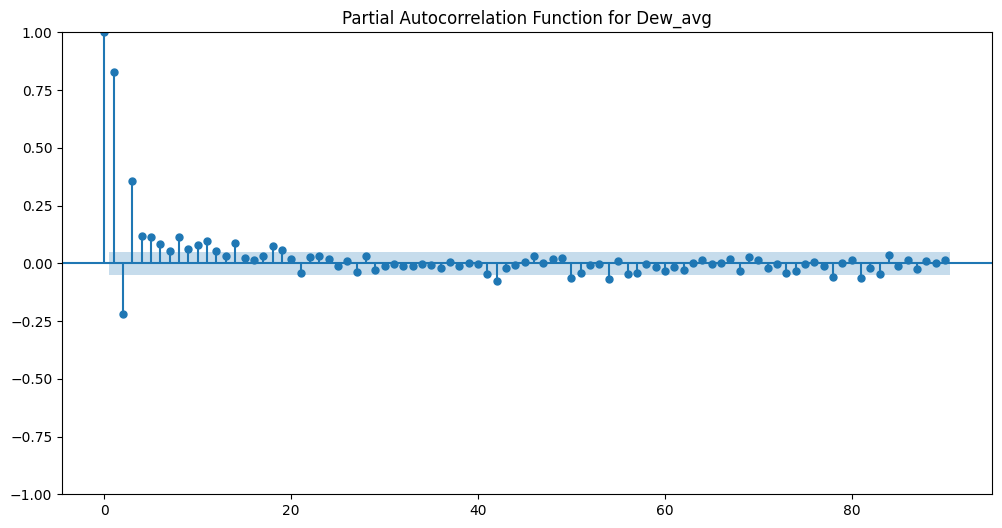

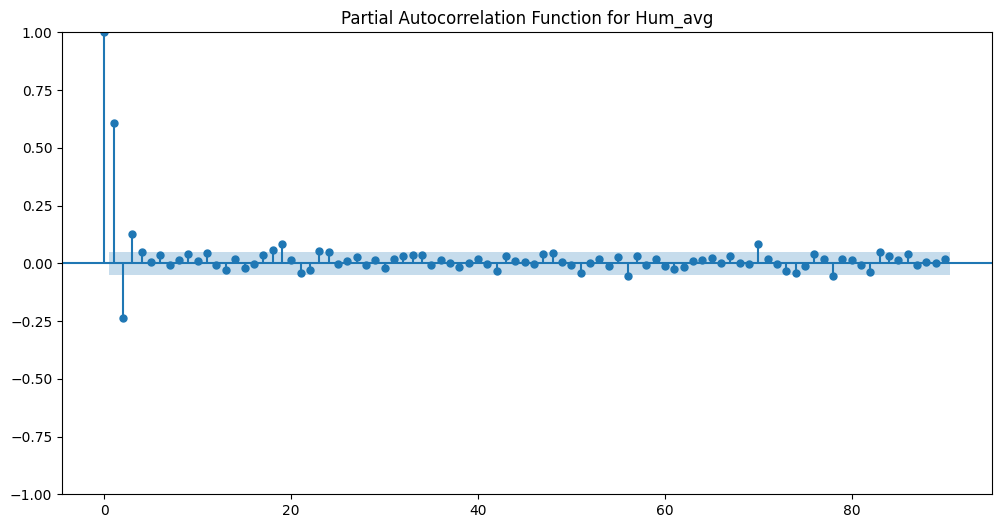

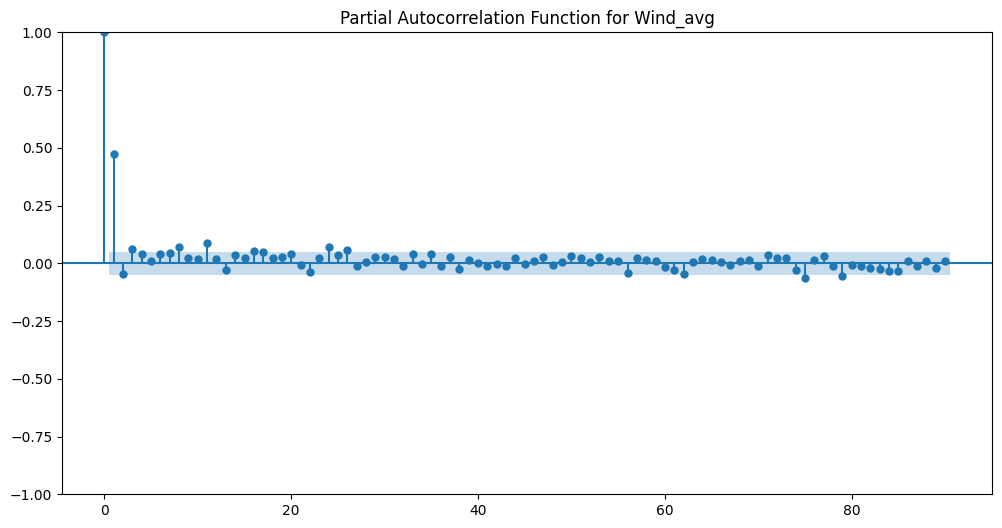

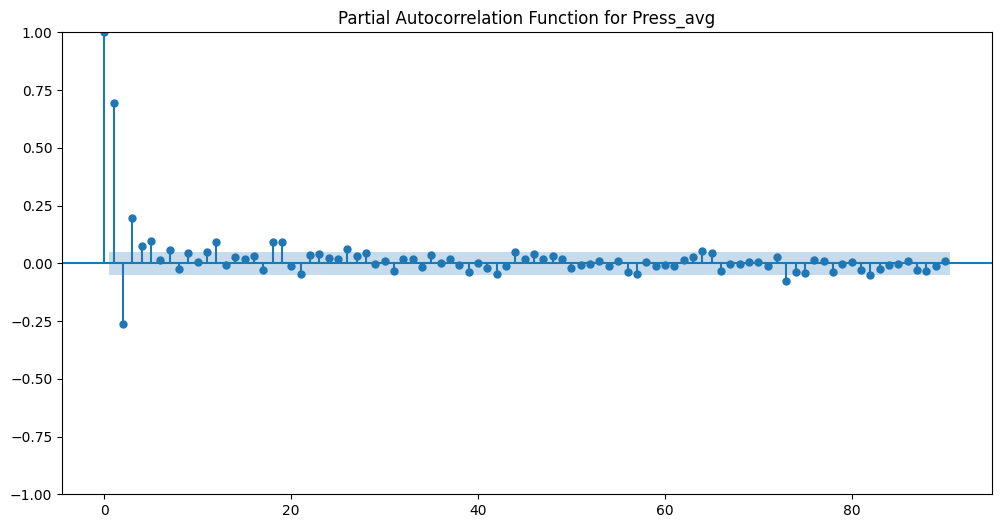

In [34]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus variables exógenas
# Variables exógenas consideradas (ajusta a tu caso)
exogenas = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

# Iteramos sobre cada variable exógena
for var in exogenas:
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(df[var], lags=90, alpha=0.05, ax=ax)  # Ajusta lags si es necesario
    plt.title(f'Partial Autocorrelation Function for {var}')
    plt.show()

**2. Aplicación de lags**

**3. Imputación de valores nulos**

**4. Entrenamiento modelo Prophet**

**5. Gráfico de predicciones**

**6. Cálculo de `MAE`**

**7. Gráfico del error**

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [32]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

**1. Grilla para modificación**

In [33]:
# Definimos la grilla de hiperparámetros

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [5, 10, 15, 20],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95]
}

# Definimos las variables exógenas
exo_var = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min']

tuning_results, best_params = optimize_prophet(X_train_prophet, y_train_prophet, exo_var, param_grid)

Tuning Prophet parameters:   0%|          | 0/96 [00:00<?, ?it/s]

Tuning Prophet parameters:   0%|          | 0/96 [00:00<?, ?it/s]


KeyError: "None of [Index(['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min',\n       'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min',\n       'Press_max', 'Press_avg', 'Press_min'],\n      dtype='object')] are in the [index]"

**2. Entrenamiento modelo Prophet**

**3. Gráfico de predicciones**

**4. Cálculo de `MAE`**

**5. Gráfico del error**

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [72]:
#!pip install surprise

     |████████████████████████████████| 154 kB 940 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp38-cp38-linux_x86_64.whl size=2916241 sha256=f47e1544dffc5aaddeb7e42f0f5ed8d1238880f2b221db202e8ba5bb49159656
  Stored in directory: /home/lucas/.cache/pip/wheels/99/34/23/b19f7de7352af5d1913f2654641432d6740c2666eecf2472ea
Successfully built scikit-surprise


In [39]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [126]:
df_cervezas = pd.read_csv('cervezas.csv')
display(df_cervezas.head())

print(f'\nCantidad de observaciones: {df_cervezas.shape[0]}')

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA



Cantidad de observaciones: 295059


Haremos un pequeño análisis exploratorio

In [41]:
# Conteo de valores nulos
display(df_cervezas.isnull().sum())
print(f'\nCantidad de valores nulos totales: {df_cervezas.isnull().sum().sum()}')

userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64


Cantidad de valores nulos totales: 0


In [42]:
# Conteo de cantidad de cervezas dentro del dataset
display(df_cervezas['beerName'].value_counts())
print(f'\nCantidad de cervezas únicas: {df_cervezas["beerName"].nunique()}')

beerName
90 Minute IPA                          809
Old Rasputin Russian Imperial Stout    800
Sierra Nevada Celebration Ale          731
Stone Ruination IPA                    670
Two Hearted Ale                        660
                                      ... 
Olde Towne Hefeweizen                   20
High Class Broad                        20
Black Damnation IV - Coffee Club        20
Provisions Series: Tart Of Darkness     20
Batemans XXXB                           20
Name: count, Length: 3689, dtype: int64


Cantidad de cervezas únicas: 3689


In [43]:
# Cantidad de ciudadanos que participaron
display(df_cervezas['userId'].value_counts())
print(f'\nCantidad de ciudadanos participantes: {df_cervezas["userId"].nunique()}')

userId
35       9691
10099    8305
147      8142
140      6876
287      6143
         ... 
10902      20
8546       20
807        20
2760       20
4412       20
Name: count, Length: 706, dtype: int64


Cantidad de ciudadanos participantes: 706


In [52]:
# Descripción de la variable 'rating'
display(df_cervezas['rating'].describe())

count    295059.000000
mean          3.860367
std           0.702807
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

**1. Gráficos y estadística descriptiva**

In [127]:
# Cantidad de usuarios en el dataset
print(f'Cantidad de usuarios presentes: {df_cervezas["userId"].nunique()}')

# Cantidad de productos según ID y nombre
print(f'\nCantidad de productos según su ID: {df_cervezas["beerId"].nunique()}')
print(f'Cantidad de productos según su nombre: {df_cervezas["beerName"].nunique()}')

# Cantidad de calificaciones
print(f'\nCantidad de calificaciones totales: {df_cervezas.shape[0]}')

# Cantidad de calificaciones faltantes
print(f'Cantidad de calificaciones faltantes: {df_cervezas["rating"].isnull().sum()}')

Cantidad de usuarios presentes: 706

Cantidad de productos según su ID: 3747
Cantidad de productos según su nombre: 3689

Cantidad de calificaciones totales: 295059
Cantidad de calificaciones faltantes: 0


Con estos primeros datos podemos ver que las $295.059$ observaciones fueron generadas por $706$ personas, habiendo quienes calificaron más cervezas que otros. Podríamos preguntarnos:

* ¿Quién realizó más calificaciones? ¿Quién menos?
* ¿Existen usuarios que hayan calificado más de una vez una misma cerveza?
* ¿Hay algún usuario que haya calificado todas las cervezas?

Además, si vemos la cantidad de productos en el dataset, se presenta una incongruencia, ya que hay más ID de cervezas que nombres, siendo lógico que la relación sea 1:1. Veremos estos temas a continuación

In [128]:
# Nombres de cervezas ('beerName') con distintos ID ('beerId')
beers_name = df_cervezas.groupby('beerName')['beerId'].nunique().sort_values(ascending = False)
print(f'Cantidad de cervezas con más de un ID: {beers_name[beers_name > 1].count()}')

# IDs de cervezas ('beerId') con distintos nombres ('beerName')
beers_id = df_cervezas.groupby('beerId')['beerName'].nunique().sort_values(ascending = False)
print(f'Cantidad de IDs con más de un nombre: {beers_id[beers_id > 1].count()}')

Cantidad de cervezas con más de un ID: 32
Cantidad de IDs con más de un nombre: 0


Dado que existen cervezas que poseen más de un ID, nos guiaremos por el nombre de la cerveza como identificador único para la misma.

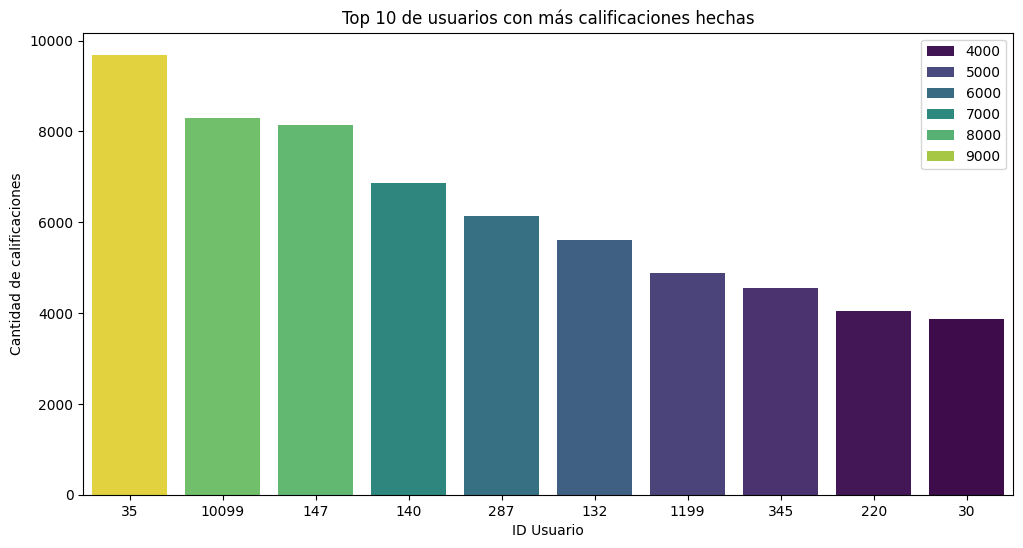

In [129]:
# Top 10 de usuarios con más calificaciones hechas
top_10 = df_cervezas['userId'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, order=top_10.index, palette='viridis', hue=top_10.values)
plt.title('Top 10 de usuarios con más calificaciones hechas')
plt.xlabel('ID Usuario')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Hay un usuario que ha calificado más de $9.000$ cervezas, siendo el universo de ellas $3.689$, lo cual nos indica que esta persona ha evaluado, por lo menos una cerveza más de una vez.

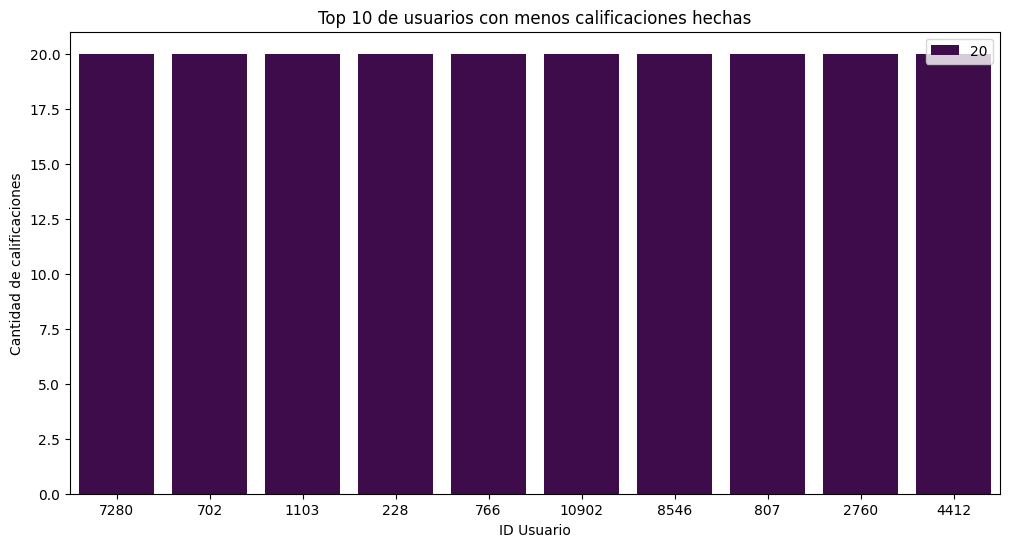

In [130]:
# Ranking de usuarios con menos calificaciones hechas
bottom_10 = df_cervezas['userId'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10.index, y=bottom_10.values, order=bottom_10.index, palette='viridis', hue=bottom_10.values)
plt.title('Top 10 de usuarios con menos calificaciones hechas')
plt.xlabel('ID Usuario')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Los usuarios que menos han calificado tienen el mismo número de calificaciones, por lo que podemos asegurar que todos los usuarios han calificado a lo menos $20$ veces las cervezas ofrecidas, pero no sabemos si calificaron una misma cerveza o diferentes (pero no nos interesa responder esta pregunta).

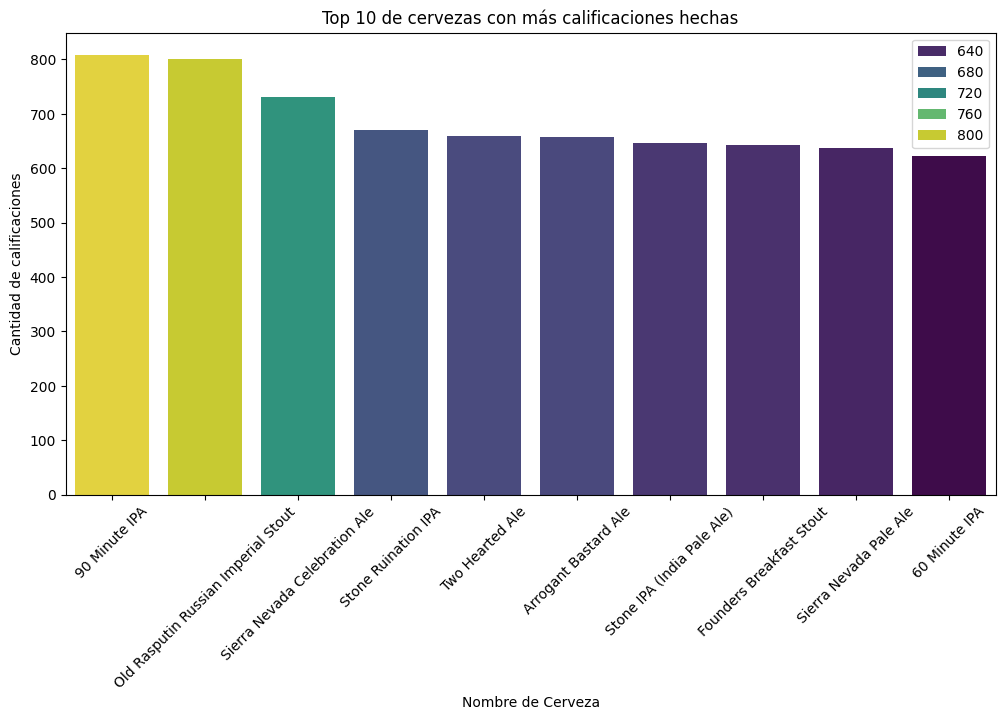

In [131]:
# Ranking de cervezas con más calificaciones
top_beers = df_cervezas['beerName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_beers.index, y=top_beers.values, order=top_beers.index, palette='viridis', hue=top_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con más calificaciones hechas')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Podemos observar que hay una cerveza que ha sido evaluada más veces que el resto, pero este gráfico representa evaluaciones en general, sin considerar si fueron evaluadas por la mayoría de las personas o en verdad es una única persona que sólo tomó esta cerveza. En el siguiente gráfico podemos verta tendencia:

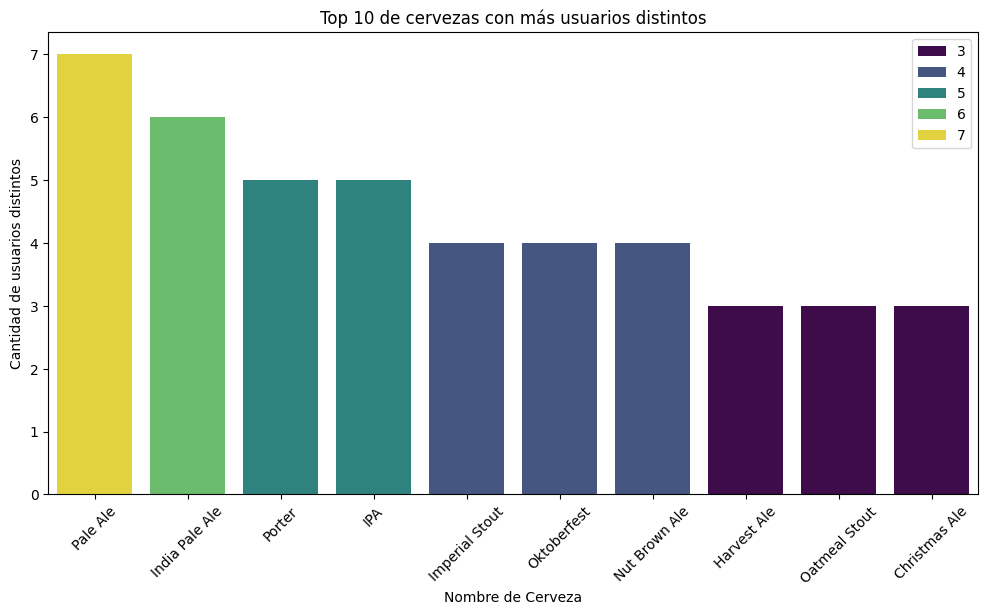

In [132]:
# Ranking de cervezas con más gama de usuarios distintos
top_beers_dist = df_cervezas.groupby('beerName')['userId'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_beers_dist.index, y=top_beers_dist.values, order=top_beers_dist.index, palette='viridis', hue=top_beers_dist.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con más usuarios distintos')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de usuarios distintos')
plt.show()

Podemos ver que las cervezas calificadas por más gente en verdad no es por tanta gente, siendo `Pale Ale` la más calificada por los usuarios (distintos todos entre ellos), pero es diferente a la primera cerveza más calificada en general (`90 Minutes IPA` con $809$). Para verificar esto, veamos cuáles son los usuarios que más han calificado una misma cerveza.

In [133]:
# Contamos las veces que un usuario ha calificado una cerveza (cada una de ellas)
conteo_repeticiones = df_cervezas.groupby(['beerName', 'userId']).size().reset_index(name='repeticiones')

# Vemos el usuario que más ha calificado cada una de las cervezas y lo ordenamos
usuario_top_por_cerveza = conteo_repeticiones.loc[conteo_repeticiones.groupby('beerName')['repeticiones'].idxmax()]
usuario_top_por_cerveza = usuario_top_por_cerveza.sort_values(by='repeticiones', ascending=False)

print(usuario_top_por_cerveza.head(10))

                                 beerName  userId  repeticiones
64                          90 Minute IPA   10099           809
2295  Old Rasputin Russian Imperial Stout     112           800
2974        Sierra Nevada Celebration Ale     140           731
3206                  Stone Ruination IPA     147           670
3489                      Two Hearted Ale     287           660
210                  Arrogant Bastard Ale     147           658
3191           Stone IPA (India Pale Ale)     147           647
1170             Founders Breakfast Stout    1199           643
2981               Sierra Nevada Pale Ale     140           637
59                          60 Minute IPA   10099           623


Con este ranking podemos ver que hay cervezas que se consumen mayoritariamente por un único usuario. Además este ranking se condice con el obtenido en primera instancia.

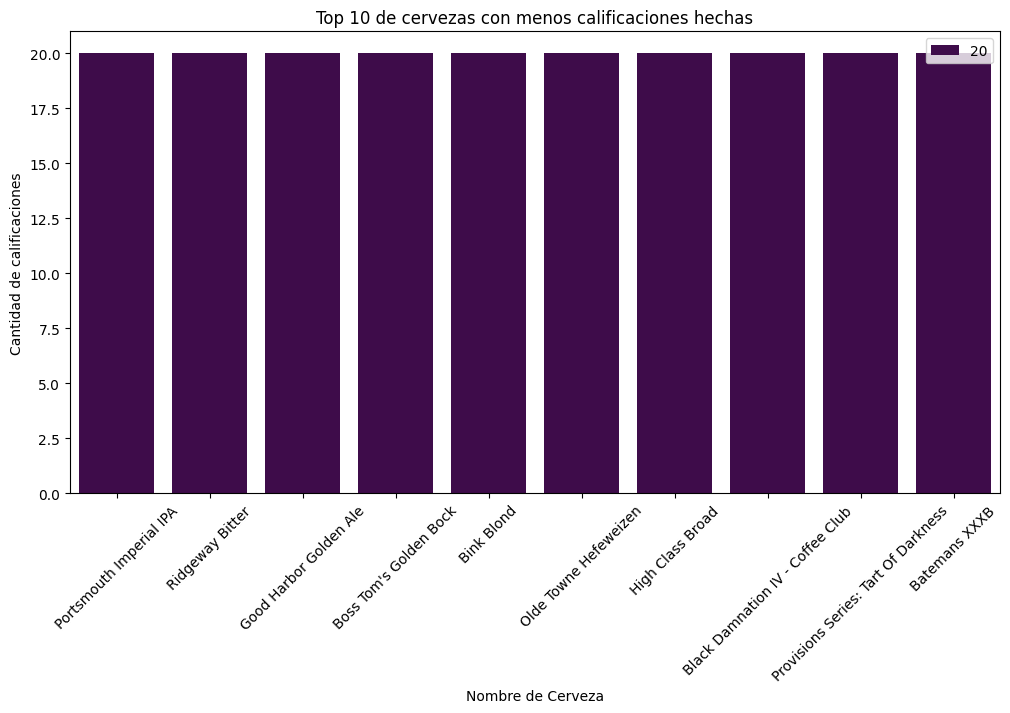

In [134]:
# Ranking de cervezas con menos calificaciones
bottom_beers = df_cervezas['beerName'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_beers.index, y=bottom_beers.values, order=bottom_beers.index, palette='viridis', hue=bottom_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con menos calificaciones hechas')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Cantidad de calificaciones')
plt.show()

Al igual que en el caso anterior, podemos ver que las cervezas con menos calificaciones tienen a lo menos 20 calificaciones, pero sin saber si vienen de un mismo usuario o de diversos usuarios, sin mostrar una tendencia general de consumo.

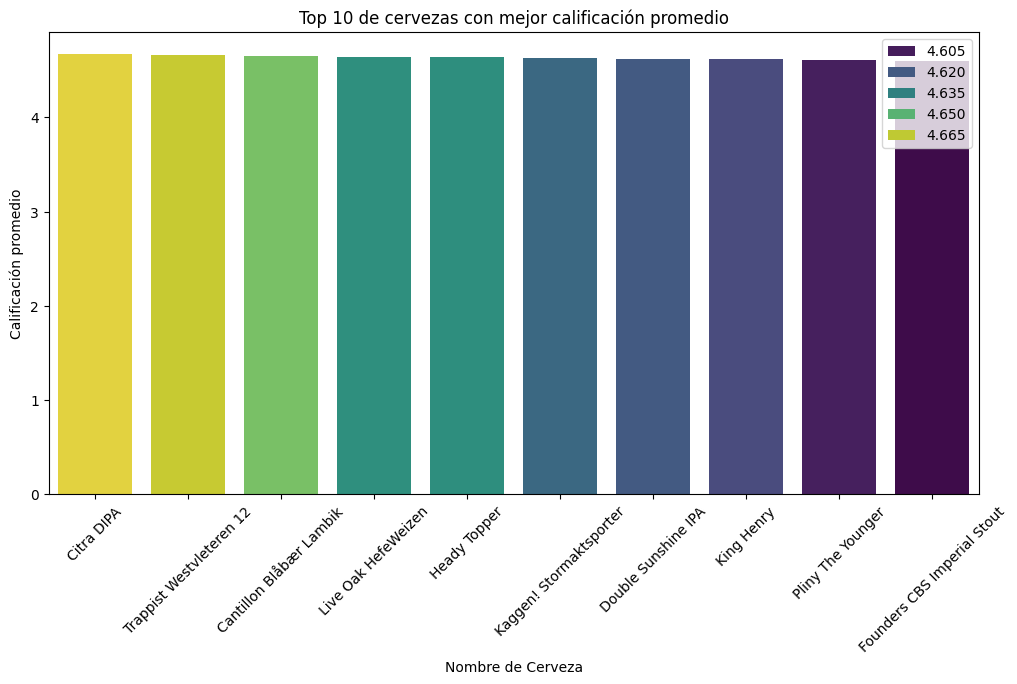

In [135]:
# Calificación promedio de cervezas (top 10)
mean_beers = df_cervezas.groupby('beerName')['rating'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_beers.index, y=mean_beers.values, order=mean_beers.index, palette='viridis', hue=mean_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con mejor calificación promedio')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Calificación promedio')
plt.show()

Podemos ver que en el top 10 de cervezas, tienen una calificación promedio bastante parecida, sobrepasando el $4.6$ de calificación, pero ninguna teniendo una calificación perfecta.

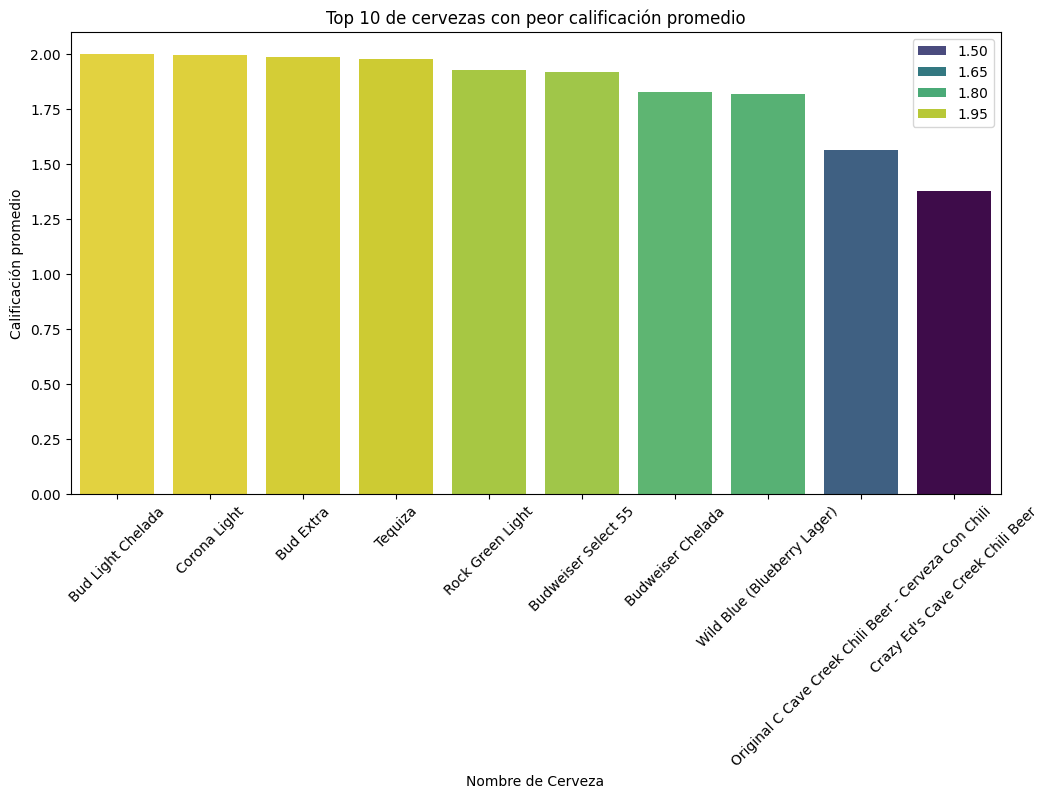

In [136]:
# Calificación promedio de cervezas (bottom 10)
mean_beers = df_cervezas.groupby('beerName')['rating'].mean().sort_values(ascending = False).tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_beers.index, y=mean_beers.values, order=mean_beers.index, palette='viridis', hue=mean_beers.values)
plt.xticks(rotation=45)
plt.title('Top 10 de cervezas con peor calificación promedio')
plt.xlabel('Nombre de Cerveza')
plt.ylabel('Calificación promedio')
plt.show()

Por otro lado, las 10 cervezas peor calificadas oscilan entre el $1.5$ y $2.0$ de calificación.

Para las calificaciones faltantes, primero podríamos decir que, según el dataset, cada usuario calificó la cerveza que tomó (se traduce en ausencia de valores `NaN` en la columna `'rating'`), pero no necesariamente cada usuario calificó todas las cervezas. Esto nos deja algunos huecos en las calificaciones globales al ver la matriz usuario-producto que se pueden traducir en `NaN`. Si contamos estos valores `NaN` llegamos al siguiente valor:

In [137]:
# Cantidad de cervezas que cada ciudadano probó visto en una matriz
df_cervezas_pivot = pd.pivot_table(df_cervezas, values='rating', index='userId', columns='beerName', aggfunc='count')

# Cantidad de valores nulos dentro de la matriz
print(f'Cantidad de calificaciones faltantes: {df_cervezas_pivot.isnull().sum().sum()}')

Cantidad de calificaciones faltantes: 2600687


Es decir, si juntamos a todos los usuarios, tenemos $2.600.687$ combinaciones de usuario-cerveza sin una calificación puesta.

**2. Datos a matrix**

In [138]:
display(df_cervezas_pivot)

beerName,"""Shabadoo"" Black & Tan Ale",# 100,#9,'t Gaverhopke Extra,'t Smisje Calva Reserva,(512) Pecan Porter,10 Commandments,10 Squared Fish Tale Ale,10.0,1000 IBU,...,Žatec,§ucaba (Abacus),Édition 2005,Éphémère (Apple),Éphémère (Cassis / Black Currant),Éphémère (Cranberry),Équinoxe Du Printemps,Ølfabrikken Porter,Über Pils,ÜberSun (Imperial Summer Wheat Beer)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Cervezas con más evaluaciones de usuarios
top_beers = df_cervezas_pivot.count().sort_values(ascending = False).head(10)
print('Cantidad de cervezas calificadas por más usuarios:')
top_beers

Cantidad de cervezas calificadas por más usuarios:


beerName
Pale Ale          7
India Pale Ale    6
Porter            5
IPA               5
Imperial Stout    4
Oktoberfest       4
Nut Brown Ale     4
Harvest Ale       3
Oatmeal Stout     3
Christmas Ale     3
dtype: int64

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

**1. Nuevo DataFrame**

In [142]:
df_cervezas_drop = df_cervezas.drop(columns = ['userId', 'rating']).copy()
df_cervezas_drop.drop_duplicates(inplace = True)

df_cervezas_drop

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA
...,...,...,...
56171,47589,Red,American Amber / Red Ale
58257,62792,Splinter Black,American Double / Imperial Stout
60806,18432,Wittekerke Rosé,Fruit / Vegetable Beer
62517,4753,Hambleton Nightmare (Extra Stout Porter),English Porter


**2. Bag Of Words**

**3. Top cervezas similares**

**4. Mejor evaluada y similares**

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
#CODIGO AQUI

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
#CODIGO AQUI

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#CODIGO AQUI

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
